In [22]:
import pandas as pd
import numpy as np
import requests 
from bs4 import BeautifulSoup
import html
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
sns.set()

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re


In [19]:
table = pd.read_csv('IDSCountry-Series.csv')
table

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,AFG,BX.KLT.DINV.CD.DT,Data on Foreign Direct Investment are based on...,NaN
1,AFG,DT.DOD.DECT.CD,Long-term public and publicly guaranteed debt ...,NaN
2,AGO,BX.KLT.DINV.CD.DT,Data on Foreign Direct Investment are based on...,NaN
3,AGO,DT.DOD.DECT.CD,Long-term public and publicly guaranteed debt ...,NaN
4,ALB,BX.KLT.DINV.CD.DT,Data on Foreign Direct Investment are based on...,NaN
...,...,...,...,...
262,ZAF,DT.DOD.DECT.CD,"Long-term public and publicly guaranteed, long...",NaN
263,ZMB,BX.KLT.DINV.CD.DT,Data on Foreign Direct Investment are based on...,NaN
264,ZMB,DT.DOD.DECT.CD,Long-term public and publicly guaranteed debt ...,NaN
265,ZWE,BX.KLT.DINV.CD.DT,Data on Foreign Direct Investment are based on...,NaN


In [20]:
table.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,AFG,BX.KLT.DINV.CD.DT,Data on Foreign Direct Investment are based on...,NaN
1,AFG,DT.DOD.DECT.CD,Long-term public and publicly guaranteed debt ...,NaN
2,AGO,BX.KLT.DINV.CD.DT,Data on Foreign Direct Investment are based on...,NaN
3,AGO,DT.DOD.DECT.CD,Long-term public and publicly guaranteed debt ...,NaN
4,ALB,BX.KLT.DINV.CD.DT,Data on Foreign Direct Investment are based on...,NaN


In [6]:
print(os.listdir("C:/Users/Asus"))


['.azuredatastudio', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.ms-ad', 'A Loan data analysis-Copy1.ipynb', 'A Loan data analysis.ipynb', 'A-Loan-Data-Example-with-NumPy-Template.ipynb', 'Absenteeism Exercise.ipynb', 'Absenteeism-data.csv', 'Absenteeism-Exercise-Lectures.ipynb', 'anaconda3', 'AppData', 'Application Data', 'bar_chart_data.csv', 'bar_line_chart_data.csv', 'Checkpoint-Strings.npz', 'checkpoint-test.npz', 'Contacts', 'Cookies', 'Corona.ipynb', 'Coronacase.ipynb', 'Corona_data.csv', 'Customer-Gender.csv', 'df-cleaned.csv', 'Diwali Sales Data.csv', 'Diwali_sales_analysis project.ipynb', 'Documents', 'Downloads', 'Downloads0.jpg', 'Downloads1.jpg', 'Downloads10.jpg', 'Downloads11.jpg', 'Downloads12.jpg', 'Downloads13.jpg', 'Downloads14.jpg', 'Downloads15.jpg', 'Downloads16.jpg', 'Downloads17.jpg', 'Downloads18.jpg', 'Downloads19.jpg', 'Downloads2.jpg', 'Downloads20.jpg', 'Downloads21.jpg', 'Downloads22.jpg', 'Downloads23

In [17]:
table.shape

(0, 3)

In [16]:
table.info


<bound method DataFrame.info of Empty DataFrame
Columns: [CountryCode, SeriesCode, DESCRIPTION]
Index: []>

In [9]:
pd.isnull(table)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
262,False,False,False,True
263,False,False,False,True
264,False,False,False,True
265,False,False,False,True


In [21]:
pd.isnull(table).sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     267
dtype: int64

In [22]:
del table['Unnamed: 3']

In [23]:
table

,CountryCode,SeriesCode,DESCRIPTION
0,AFG,BX.KLT.DINV.CD.DT,Data on Foreign Direct Investment are based on...
1,AFG,DT.DOD.DECT.CD,Long-term public and publicly guaranteed debt ...
2,AGO,BX.KLT.DINV.CD.DT,Data on Foreign Direct Investment are based on...
3,AGO,DT.DOD.DECT.CD,Long-term public and publicly guaranteed debt ...
4,ALB,BX.KLT.DINV.CD.DT,Data on Foreign Direct Investment are based on...
...,...,...,...
262,ZAF,DT.DOD.DECT.CD,"Long-term public and publicly guaranteed, long..."
263,ZMB,BX.KLT.DINV.CD.DT,Data on Foreign Direct Investment are based on...
264,ZMB,DT.DOD.DECT.CD,Long-term public and publicly guaranteed debt ...
265,ZWE,BX.KLT.DINV.CD.DT,Data on Foreign Direct Investment are based on...


In [24]:
table.shape

(267, 3)

In [25]:
table2 = pd.read_csv('IDSData.csv')
table2

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 59
0,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.DPPG,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.OFFT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.PRVT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.DPPG,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.OFFT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29099,Zimbabwe,ZWE,Total reserves in months of imports,FI.RES.TOTL.MO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29100,Zimbabwe,ZWE,"Undisbursed external debt, official creditors ...",DT.UND.OFFT.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,237654000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29101,Zimbabwe,ZWE,"Undisbursed external debt, private creditors (...",DT.UND.PRVT.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,4656000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29102,Zimbabwe,ZWE,"Undisbursed external debt, total (UND, current...",DT.UND.DPPG.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,242310000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
table.describe()

,CountryCode,SeriesCode,DESCRIPTION
count,267,267,267
unique,134,6,85
top,IND,BX.KLT.DINV.CD.DT,Data on Foreign Direct Investment are based on...
freq,5,134,134


In [27]:
pd.isnull(table2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 59
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29099,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
29100,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
29101,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
29102,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True


In [28]:
pd.isnull(table2).sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
1970               1560
1971               1537
1972               1517
1973               1503
1974               1412
1975               1297
1976               1158
1977                954
1978                895
1979                866
1980                818
1981                758
1982                708
1983                704
1984                675
1985                647
1986                634
1987                625
1988                622
1989                602
1990                592
1991                574
1992                534
1993                465
1994                420
1995                393
1996                374
1997                336
1998                349
1999                341
2000                329
2001                320
2002                315
2003                299
2004                277
2005                264
2006                250
2007            

In [30]:
del table2['Unnamed: 59']

In [31]:
del table2['2017']

In [32]:
table2. drop(columns=[ '2018', '2019','2020','2021','2022','2023','2024'], inplace=True)

In [33]:
table2

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.DPPG,0.0,0.0,0.0,0.0,0.0,0.0,...,8.083300e+00,9.957500e+00,0.000000e+00,7.833300e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.983330e+01,0.000000e+00,0.0
1,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.OFFT,0.0,0.0,0.0,0.0,0.0,0.0,...,8.083300e+00,9.957500e+00,0.000000e+00,7.833300e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.983330e+01,0.000000e+00,0.0
2,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.PRVT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.DPPG,0.0,0.0,0.0,0.0,0.0,0.0,...,6.983570e+01,8.052340e+01,0.000000e+00,5.319570e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.637800e+01,0.000000e+00,0.0
4,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.OFFT,0.0,0.0,0.0,0.0,0.0,0.0,...,6.983570e+01,8.052340e+01,0.000000e+00,5.319570e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.637800e+01,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29099,Zimbabwe,ZWE,Total reserves in months of imports,FI.RES.TOTL.MO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.334669e+00,1.331810e+00,8.301899e-01,7.938052e-01,6.400787e-01,5.110783e-01,6.373088e-01,NaN
29100,Zimbabwe,ZWE,"Undisbursed external debt, official creditors ...",DT.UND.OFFT.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,2.926710e+08,1.306620e+08,1.029070e+08,2.397460e+08,3.872690e+08,4.812160e+08,4.300090e+08,3.507430e+08,2.615110e+08,237654000.0
29101,Zimbabwe,ZWE,"Undisbursed external debt, private creditors (...",DT.UND.PRVT.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,2.584200e+07,1.228600e+07,1.233200e+07,1.080400e+07,5.727000e+06,5.748000e+06,5.798000e+06,5.661000e+06,4.657000e+06,4656000.0
29102,Zimbabwe,ZWE,"Undisbursed external debt, total (UND, current...",DT.UND.DPPG.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,3.185130e+08,1.429480e+08,1.152390e+08,2.505500e+08,3.929960e+08,4.869640e+08,4.358070e+08,3.564040e+08,2.661680e+08,242310000.0


In [34]:
table2["1970"].fillna("0.0", inplace = True)
 
table2

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.DPPG,0.0,0.0,0.0,0.0,0.0,0.0,...,8.083300e+00,9.957500e+00,0.000000e+00,7.833300e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.983330e+01,0.000000e+00,0.0
1,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.OFFT,0.0,0.0,0.0,0.0,0.0,0.0,...,8.083300e+00,9.957500e+00,0.000000e+00,7.833300e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.983330e+01,0.000000e+00,0.0
2,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.PRVT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.DPPG,0.0,0.0,0.0,0.0,0.0,0.0,...,6.983570e+01,8.052340e+01,0.000000e+00,5.319570e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.637800e+01,0.000000e+00,0.0
4,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.OFFT,0.0,0.0,0.0,0.0,0.0,0.0,...,6.983570e+01,8.052340e+01,0.000000e+00,5.319570e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.637800e+01,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29099,Zimbabwe,ZWE,Total reserves in months of imports,FI.RES.TOTL.MO,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.334669e+00,1.331810e+00,8.301899e-01,7.938052e-01,6.400787e-01,5.110783e-01,6.373088e-01,NaN
29100,Zimbabwe,ZWE,"Undisbursed external debt, official creditors ...",DT.UND.OFFT.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,2.926710e+08,1.306620e+08,1.029070e+08,2.397460e+08,3.872690e+08,4.812160e+08,4.300090e+08,3.507430e+08,2.615110e+08,237654000.0
29101,Zimbabwe,ZWE,"Undisbursed external debt, private creditors (...",DT.UND.PRVT.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,2.584200e+07,1.228600e+07,1.233200e+07,1.080400e+07,5.727000e+06,5.748000e+06,5.798000e+06,5.661000e+06,4.657000e+06,4656000.0
29102,Zimbabwe,ZWE,"Undisbursed external debt, total (UND, current...",DT.UND.DPPG.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,3.185130e+08,1.429480e+08,1.152390e+08,2.505500e+08,3.929960e+08,4.869640e+08,4.358070e+08,3.564040e+08,2.661680e+08,242310000.0


In [35]:


newdf = table2.fillna(0.0)

In [36]:
table2.fillna(value = 0,
          inplace = True)

In [37]:
table2

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.DPPG,0.0,0.0,0.0,0.0,0.0,0.0,...,8.083300e+00,9.957500e+00,0.000000e+00,7.833300e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.983330e+01,0.000000e+00,0.0
1,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.OFFT,0.0,0.0,0.0,0.0,0.0,0.0,...,8.083300e+00,9.957500e+00,0.000000e+00,7.833300e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.983330e+01,0.000000e+00,0.0
2,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.PRVT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.DPPG,0.0,0.0,0.0,0.0,0.0,0.0,...,6.983570e+01,8.052340e+01,0.000000e+00,5.319570e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.637800e+01,0.000000e+00,0.0
4,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.OFFT,0.0,0.0,0.0,0.0,0.0,0.0,...,6.983570e+01,8.052340e+01,0.000000e+00,5.319570e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.637800e+01,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29099,Zimbabwe,ZWE,Total reserves in months of imports,FI.RES.TOTL.MO,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,2.334669e+00,1.331810e+00,8.301899e-01,7.938052e-01,6.400787e-01,5.110783e-01,6.373088e-01,0.0
29100,Zimbabwe,ZWE,"Undisbursed external debt, official creditors ...",DT.UND.OFFT.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,2.926710e+08,1.306620e+08,1.029070e+08,2.397460e+08,3.872690e+08,4.812160e+08,4.300090e+08,3.507430e+08,2.615110e+08,237654000.0
29101,Zimbabwe,ZWE,"Undisbursed external debt, private creditors (...",DT.UND.PRVT.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,2.584200e+07,1.228600e+07,1.233200e+07,1.080400e+07,5.727000e+06,5.748000e+06,5.798000e+06,5.661000e+06,4.657000e+06,4656000.0
29102,Zimbabwe,ZWE,"Undisbursed external debt, total (UND, current...",DT.UND.DPPG.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,3.185130e+08,1.429480e+08,1.152390e+08,2.505500e+08,3.929960e+08,4.869640e+08,4.358070e+08,3.564040e+08,2.661680e+08,242310000.0


In [38]:
table2.info

<bound method DataFrame.info of       Country Name Country Code   
0      Afghanistan          AFG  \
1      Afghanistan          AFG   
2      Afghanistan          AFG   
3      Afghanistan          AFG   
4      Afghanistan          AFG   
...            ...          ...   
29099     Zimbabwe          ZWE   
29100     Zimbabwe          ZWE   
29101     Zimbabwe          ZWE   
29102     Zimbabwe          ZWE   
29103     Zimbabwe          ZWE   

                                          Indicator Name  Indicator Code 1970   
0      Average grace period on new external debt comm...     DT.GPA.DPPG  0.0  \
1      Average grace period on new external debt comm...     DT.GPA.OFFT  0.0   
2      Average grace period on new external debt comm...     DT.GPA.PRVT  0.0   
3      Average grant element on new external debt com...     DT.GRE.DPPG  0.0   
4      Average grant element on new external debt com...     DT.GRE.OFFT  0.0   
...                                                  ...     

In [39]:
table2. drop(columns=[ '1976'], inplace=True)

In [58]:
table2.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1977,1978,1979,1980,1981,1982,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.DPPG,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0833,9.9575,0.0,7.8333,0.0,0.0,0.0,29.8333,0.0,0.0
1,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.OFFT,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0833,9.9575,0.0,7.8333,0.0,0.0,0.0,29.8333,0.0,0.0
2,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.PRVT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0
3,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.DPPG,0.0,0.0,0.0,0.0,0.0,0.0,...,69.8357,80.5234,0.0,53.1957,0.0,0.0,0.0,96.3780,0.0,0.0
4,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.OFFT,0.0,0.0,0.0,0.0,0.0,0.0,...,69.8357,80.5234,0.0,53.1957,0.0,0.0,0.0,96.3780,0.0,0.0
5,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.PRVT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0
6,Afghanistan,AFG,Average interest on new external debt commitme...,DT.INR.DPPG,0.0,0.0,0.0,0.0,0.0,0.0,...,1.3852,0.4823,0.0,3.0000,0.0,0.0,0.0,0.0000,0.0,0.0
7,Afghanistan,AFG,Average interest on new external debt commitme...,DT.INR.OFFT,0.0,0.0,0.0,0.0,0.0,0.0,...,1.3852,0.4823,0.0,3.0000,0.0,0.0,0.0,0.0000,0.0,0.0
8,Afghanistan,AFG,Average interest on new external debt commitme...,DT.INR.PRVT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0
9,Afghanistan,AFG,Average maturity on new external debt commitme...,DT.MAT.DPPG,0.0,0.0,0.0,0.0,0.0,0.0,...,31.5833,34.6338,0.0,25.3333,0.0,0.0,0.0,40.0000,0.0,0.0


In [60]:
table2.count(0)

Country Name      29104
Country Code      29104
Indicator Name    29104
Indicator Code    29104
1970              29104
1971              29104
1972              29104
1973              29104
1974              29104
1975              29104
1977              29104
1978              29104
1979              29104
1980              29104
1981              29104
1982              29104
1983              29104
1984              29104
1985              29104
1986              29104
1987              29104
1988              29104
1989              29104
1990              29104
1991              29104
1992              29104
1993              29104
1994              29104
1995              29104
1996              29104
1997              29104
1998              29104
1999              29104
2000              29104
2001              29104
2002              29104
2003              29104
2004              29104
2005              29104
2006              29104
2007              29104
2008            

In [65]:
table2['Indicator Name']. nunique()

214

In [3]:
df = pd.read_csv('IDSCountry.csv')
df

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2011",NaN,NaN,NaN,2015.0,2000.0,NaN
1,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2015.0,2005.0,NaN
2,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2015.0,2006.0,NaN
3,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,National Institute of Statistics and Census re...,Latin America & Caribbean,Upper middle income,AR,...,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey, 2011/12","Integrated household survey (IHS), 2014",Yes,2008,2002.0,2015.0,2011.0,NaN
4,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,AM,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2014",Yes,2014,NaN,2015.0,2012.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,XKX,Kosovo,Kosovo,Republic of Kosovo,XK,Euro,WB-3 code changed from KSV to XKX to align wit...,Europe & Central Asia,Lower middle income,XK,...,Enhanced General Data Dissemination System (e-...,2011,"Multiple Indicator Cluster Survey, 2013/14","Expenditure survey/budget survey (ES/BS), 2013",NaN,2014,NaN,NaN,NaN,NaN
132,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,Enhanced General Data Dissemination System (e-...,2004,"Demographic and Health Survey, 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2012.0,2015.0,2005.0,NaN
133,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2003; World Hea...","Expenditure survey/budget survey (ES/BS), 2010/11",NaN,2007,2010.0,2016.0,2013.0,NaN
134,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,The base year is 2010. National accounts data ...,Sub-Saharan Africa,Lower middle income,ZM,...,Enhanced General Data Dissemination System (e-...,2010,"Demographic and Health Survey, 2013/14","Integrated household survey (IHS), 2010",NaN,NaN,NaN,2015.0,2002.0,NaN


In [4]:
df["Vital registration complete"].fillna("No", inplace = True)
 
df

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2011",No,NaN,NaN,2015.0,2000.0,NaN
1,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",No,NaN,NaN,2015.0,2005.0,NaN
2,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2015.0,2006.0,NaN
3,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,National Institute of Statistics and Census re...,Latin America & Caribbean,Upper middle income,AR,...,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey, 2011/12","Integrated household survey (IHS), 2014",Yes,2008,2002.0,2015.0,2011.0,NaN
4,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,AM,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2014",Yes,2014,NaN,2015.0,2012.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,XKX,Kosovo,Kosovo,Republic of Kosovo,XK,Euro,WB-3 code changed from KSV to XKX to align wit...,Europe & Central Asia,Lower middle income,XK,...,Enhanced General Data Dissemination System (e-...,2011,"Multiple Indicator Cluster Survey, 2013/14","Expenditure survey/budget survey (ES/BS), 2013",No,2014,NaN,NaN,NaN,NaN
132,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,Enhanced General Data Dissemination System (e-...,2004,"Demographic and Health Survey, 2013","Expenditure survey/budget survey (ES/BS), 2005",No,NaN,2012.0,2015.0,2005.0,NaN
133,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2003; World Hea...","Expenditure survey/budget survey (ES/BS), 2010/11",No,2007,2010.0,2016.0,2013.0,NaN
134,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,The base year is 2010. National accounts data ...,Sub-Saharan Africa,Lower middle income,ZM,...,Enhanced General Data Dissemination System (e-...,2010,"Demographic and Health Survey, 2013/14","Integrated household survey (IHS), 2010",No,NaN,NaN,2015.0,2002.0,NaN


In [5]:
df.head(10)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2011",No,NaN,NaN,2015.0,2000.0,NaN
1,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",No,NaN,NaN,2015.0,2005.0,NaN
2,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2015.0,2006.0,NaN
3,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,National Institute of Statistics and Census re...,Latin America & Caribbean,Upper middle income,AR,...,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey, 2011/12","Integrated household survey (IHS), 2014",Yes,2008,2002.0,2015.0,2011.0,NaN
4,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,AM,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2014",Yes,2014,NaN,2015.0,2012.0,NaN
5,AZE,Azerbaijan,Azerbaijan,Republic of Azerbaijan,AZ,New Azeri manat,NaN,Europe & Central Asia,Upper middle income,AZ,...,Enhanced General Data Dissemination System (e-...,2009,"Demographic and Health Survey, 2006",Living Standards Measurement Study Survey (LSM...,Yes,2015,2013.0,2015.0,2012.0,NaN
6,BDI,Burundi,Burundi,Republic of Burundi,BI,Burundi franc,NaN,Sub-Saharan Africa,Low income,BI,...,Enhanced General Data Dissemination System (e-...,2008,"Demographic and Health Survey, 2016",Core Welfare Indicator Questionnaire Survey (C...,No,NaN,2012.0,2015.0,2000.0,NaN
7,BEN,Benin,Benin,Republic of Benin,BJ,West African CFA franc,NaN,Sub-Saharan Africa,Low income,BJ,...,Enhanced General Data Dissemination System (e-...,2013,"Multiple Indicator Cluster Survey, 2014",Core Welfare Indicator Questionnaire Survey (C...,No,NaN,NaN,2015.0,2001.0,NaN
8,BFA,Burkina Faso,Burkina Faso,Burkina Faso,BF,West African CFA franc,NaN,Sub-Saharan Africa,Low income,BF,...,Enhanced General Data Dissemination System (e-...,2006,"Living Standards Measurement Study, 2014; Mala...",Core Welfare Indicator Questionnaire Survey (C...,No,2006-10,NaN,2015.0,2005.0,NaN
9,BGD,Bangladesh,Bangladesh,People's Republic of Bangladesh,BD,Bangladeshi taka,Fiscal year end: June 30; reporting period for...,South Asia,Lower middle income,BD,...,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2014","Integrated household survey (IHS), 2010",No,2008,2011.0,2011.0,2008.0,NaN


In [6]:
df.fillna(value = 0,
          inplace = True)

In [7]:
df

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2011",No,0,0.0,2015.0,2000.0,0.0
1,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,0,Sub-Saharan Africa,Lower middle income,AO,...,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",No,0,0.0,2015.0,2005.0,0.0
2,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,0,Europe & Central Asia,Upper middle income,AL,...,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2015.0,2006.0,0.0
3,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,National Institute of Statistics and Census re...,Latin America & Caribbean,Upper middle income,AR,...,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey, 2011/12","Integrated household survey (IHS), 2014",Yes,2008,2002.0,2015.0,2011.0,0.0
4,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,0,Europe & Central Asia,Lower middle income,AM,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2014",Yes,2014,0.0,2015.0,2012.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,XKX,Kosovo,Kosovo,Republic of Kosovo,XK,Euro,WB-3 code changed from KSV to XKX to align wit...,Europe & Central Asia,Lower middle income,XK,...,Enhanced General Data Dissemination System (e-...,2011,"Multiple Indicator Cluster Survey, 2013/14","Expenditure survey/budget survey (ES/BS), 2013",No,2014,0.0,0.0,0.0,0.0
132,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,Enhanced General Data Dissemination System (e-...,2004,"Demographic and Health Survey, 2013","Expenditure survey/budget survey (ES/BS), 2005",No,0,2012.0,2015.0,2005.0,0.0
133,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2003; World Hea...","Expenditure survey/budget survey (ES/BS), 2010/11",No,2007,2010.0,2016.0,2013.0,0.0
134,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,The base year is 2010. National accounts data ...,Sub-Saharan Africa,Lower middle income,ZM,...,Enhanced General Data Dissemination System (e-...,2010,"Demographic and Health Survey, 2013/14","Integrated household survey (IHS), 2010",No,0,0.0,2015.0,2002.0,0.0


In [8]:
df. drop(columns=[ 'Unnamed: 31'], inplace=True)

In [9]:
df

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2011",No,0,0.0,2015.0,2000.0
1,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,0,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",No,0,0.0,2015.0,2005.0
2,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,0,Europe & Central Asia,Upper middle income,AL,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2015.0,2006.0
3,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,National Institute of Statistics and Census re...,Latin America & Caribbean,Upper middle income,AR,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey, 2011/12","Integrated household survey (IHS), 2014",Yes,2008,2002.0,2015.0,2011.0
4,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,0,Europe & Central Asia,Lower middle income,AM,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2014",Yes,2014,0.0,2015.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,XKX,Kosovo,Kosovo,Republic of Kosovo,XK,Euro,WB-3 code changed from KSV to XKX to align wit...,Europe & Central Asia,Lower middle income,XK,...,0,Enhanced General Data Dissemination System (e-...,2011,"Multiple Indicator Cluster Survey, 2013/14","Expenditure survey/budget survey (ES/BS), 2013",No,2014,0.0,0.0,0.0
132,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2004,"Demographic and Health Survey, 2013","Expenditure survey/budget survey (ES/BS), 2005",No,0,2012.0,2015.0,2005.0
133,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2003; World Hea...","Expenditure survey/budget survey (ES/BS), 2010/11",No,2007,2010.0,2016.0,2013.0
134,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,The base year is 2010. National accounts data ...,Sub-Saharan Africa,Lower middle income,ZM,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2010,"Demographic and Health Survey, 2013/14","Integrated household survey (IHS), 2010",No,0,0.0,2015.0,2002.0


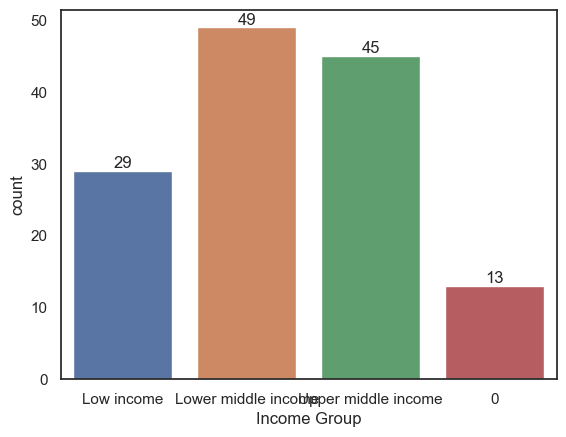

In [10]:
sns.set_style('white')
ax = sns.countplot(x = 'Income Group',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [11]:
df['Government Accounting concept'].nunique()

3

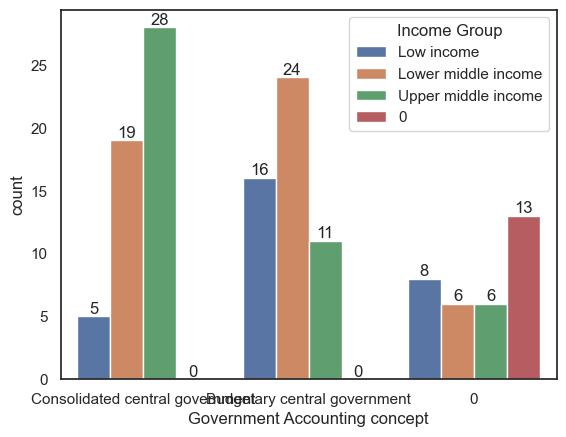

In [12]:
ax = sns.countplot(data = df, x = 'Government Accounting concept', hue = 'Income Group')

for bars in ax.containers:
    ax.bar_label(bars)

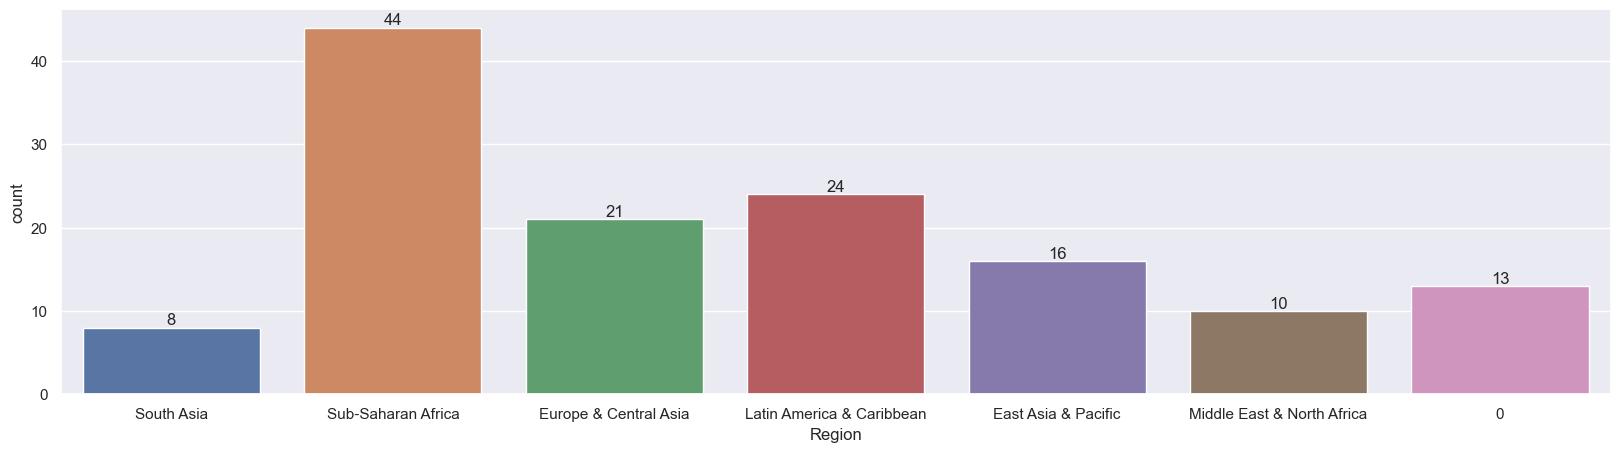

In [13]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Region')

for bars in ax.containers:
    ax.bar_label(bars)

In [19]:
df['Short Name']

0       Afghanistan
1            Angola
2           Albania
3         Argentina
4           Armenia
           ...     
131          Kosovo
132           Yemen
133    South Africa
134          Zambia
135        Zimbabwe
Name: Short Name, Length: 136, dtype: object

In [20]:
df.head(10)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2011",No,0,0.0,2015.0,2000.0
1,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,0,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",No,0,0.0,2015.0,2005.0
2,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,0,Europe & Central Asia,Upper middle income,AL,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2015.0,2006.0
3,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,National Institute of Statistics and Census re...,Latin America & Caribbean,Upper middle income,AR,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey, 2011/12","Integrated household survey (IHS), 2014",Yes,2008,2002.0,2015.0,2011.0
4,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,0,Europe & Central Asia,Lower middle income,AM,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2014",Yes,2014,0.0,2015.0,2012.0
5,AZE,Azerbaijan,Azerbaijan,Republic of Azerbaijan,AZ,New Azeri manat,0,Europe & Central Asia,Upper middle income,AZ,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2009,"Demographic and Health Survey, 2006",Living Standards Measurement Study Survey (LSM...,Yes,2015,2013.0,2015.0,2012.0
6,BDI,Burundi,Burundi,Republic of Burundi,BI,Burundi franc,0,Sub-Saharan Africa,Low income,BI,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2008,"Demographic and Health Survey, 2016",Core Welfare Indicator Questionnaire Survey (C...,No,0,2012.0,2015.0,2000.0
7,BEN,Benin,Benin,Republic of Benin,BJ,West African CFA franc,0,Sub-Saharan Africa,Low income,BJ,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2013,"Multiple Indicator Cluster Survey, 2014",Core Welfare Indicator Questionnaire Survey (C...,No,0,0.0,2015.0,2001.0
8,BFA,Burkina Faso,Burkina Faso,Burkina Faso,BF,West African CFA franc,0,Sub-Saharan Africa,Low income,BF,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2006,"Living Standards Measurement Study, 2014; Mala...",Core Welfare Indicator Questionnaire Survey (C...,No,2006-10,0.0,2015.0,2005.0
9,BGD,Bangladesh,Bangladesh,People's Republic of Bangladesh,BD,Bangladeshi taka,Fiscal year end: June 30; reporting period for...,South Asia,Lower middle income,BD,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2014","Integrated household survey (IHS), 2010",No,2008,2011.0,2011.0,2008.0


In [28]:
df.tail(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
131,XKX,Kosovo,Kosovo,Republic of Kosovo,XK,Euro,WB-3 code changed from KSV to XKX to align wit...,Europe & Central Asia,Lower middle income,XK,...,0,Enhanced General Data Dissemination System (e-...,2011,"Multiple Indicator Cluster Survey, 2013/14","Expenditure survey/budget survey (ES/BS), 2013",No,2014,0.0,0.0,0.0
132,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2004,"Demographic and Health Survey, 2013","Expenditure survey/budget survey (ES/BS), 2005",No,0,2012.0,2015.0,2005.0
133,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2003; World Hea...","Expenditure survey/budget survey (ES/BS), 2010/11",No,2007,2010.0,2016.0,2013.0
134,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,The base year is 2010. National accounts data ...,Sub-Saharan Africa,Lower middle income,ZM,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2010,"Demographic and Health Survey, 2013/14","Integrated household survey (IHS), 2010",No,0,0.0,2015.0,2002.0
135,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2012,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2011/12",No,0,0.0,2015.0,2007.0
